# Fashion MINST Item Classifier

The Goal: Use the brightness levels of pixels in the image dataset to classify types of fashion items.

First we'll need to load in the dataset and see what it looks like

## Dataset Loader and Visualiser

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)
205


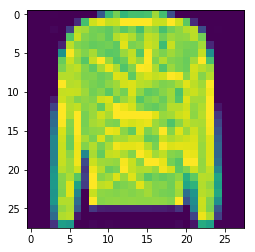

In [30]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# Show one of the images from the training dataset
plt.imshow(x_train[27])
print(x_train[27][15][15])

## Dataset Normalisation

In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Split training data further into 80% training and 20% validation data

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

print("x_valid shape:", x_valid.shape, "y_valid shape:", y_valid.shape)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_valid shape: (12000, 28, 28) y_valid shape: (12000,)
x_train shape: (48000, 28, 28) y_train shape: (48000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


## Create the model

In [37]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

# model = tf.keras.Sequential()

print("x_valid shape:", x_valid.shape, "y_valid shape:", y_valid.shape)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# Take a look at the model summary
# model.summary()

x_valid shape: (12000, 28, 28) y_valid shape: (12000,)
x_train shape: (48000, 28, 28) y_train shape: (48000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


## Compile the model

In [34]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

In [36]:
# checkpoint = ModelCheckpoint(filepath='/Users/stewa/checkpoint-{epoch:02d}-{val_loss:.2f}.hdf5')
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid)
         )

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (48000, 28, 28)